In [1]:
import pandas as pd
import numpy as np
import re
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafile= '/Users/yogevladani/study/year c/ניתוח בפייתון/מטלות/matala2/matala2_cosmetics_2019-Nov.csv'

In [3]:
data= pd.read_csv(datafile)
data.head()

/var/folders/gw/_gx47l1n2cb_95xxx6f5632h0000gn/T/ipykernel_26157/181785712.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv(datafile)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [4]:
#data=data.iloc[:100000]

### Q1

In [5]:
data['event_time'] = pd.to_datetime(data['event_time'])

In [6]:
#data["event_time"] = pd.to_datetime(data["event_time"],format='%Y-%m-%d %H:%M:%S %Z')
data.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                         object
user_id                        int64
user_session                  object
dtype: object

In [7]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [8]:
#data=data.iloc[30:150000]
data=data.sort_values(by=["user_id","user_session"])


In [9]:
# the difference between one row to the next row, the difult is between one row to the previus row

In [10]:
data['duration_to_next_event']=data.groupby("user_session")["event_time"].diff(-1)

In [11]:
data['duration_to_next_event']=data['duration_to_next_event'].dt.total_seconds()

In [12]:
# absolut values and fill the nan values as 0

In [13]:
data["duration_to_next_event"]=data["duration_to_next_event"].fillna(0)
data["duration_to_next_event"]=np.abs(data['duration_to_next_event'])
data.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0


### Q2

In [14]:
data=data.sort_values(by=["user_id","event_time"])

In [15]:
# Convert event_time column to datetime format and extract date only
#data['event_time'] = pd.to_datetime(data['event_time']).dt.date

In [16]:
# Calculate time difference between consecutive events for each user
data['time_diff'] = data.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(seconds=0))

In [17]:
# Calculate cumulative sum of time differences greater than 5 days for each user
data['funnel_number'] = (data['time_diff'] > pd.Timedelta(days=5)).groupby(data['user_id']).cumsum() + 1

#### Exemple of 420448483 user_id after the new colummn funnel_number.
#### We can see the difference funnel number for this user_id.

In [18]:
data[data['user_id']==420448483].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number
13954,2019-11-01 06:39:43+00:00,cart,5900636,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,9.0,0 days 00:00:00,1
13962,2019-11-01 06:39:52+00:00,cart,5900633,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,16.0,0 days 00:00:09,1
13983,2019-11-01 06:40:08+00:00,cart,5900628,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,20.0,0 days 00:00:16,1
14003,2019-11-01 06:40:28+00:00,cart,5900621,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,19.0,0 days 00:00:20,1
14024,2019-11-01 06:40:47+00:00,cart,5900613,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,99.0,0 days 00:00:19,1


#### We can see the funnel number distribution of the users.
#### Most of the users have only 1 funnel number.

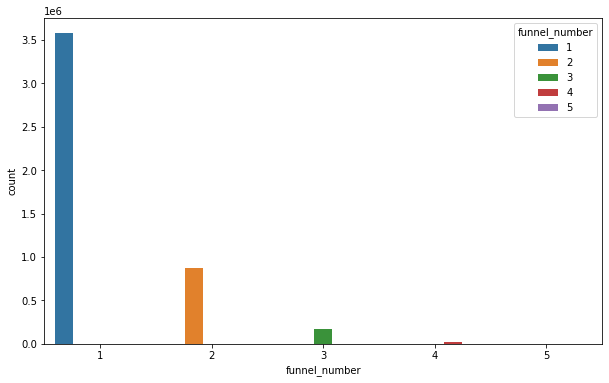

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='funnel_number', hue='funnel_number', data=data)
plt.show()

## Q3

In [20]:
data['index_in_funnel']=data.groupby(['user_id','funnel_number'])['event_time'].cumcount()+1
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,time_diff,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,0 days 00:00:00,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,0 days 00:00:00,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0 days 01:18:39,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1 days 00:43:18,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,0 days 00:00:21,1,4


### Q4

In [ ]:
data['price'] = data['price'].apply(lambda x: float(re.findall('([0-9].+?)', str(x))[0]))
data.head()

#### Two ways to check that the price column not contain string values.

In [ ]:
if data['price'].dtype == "object":
    print("price column contain string")
else:
    print("price column not contain string")

data['price'].dtype

## Q5

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='event_type', hue='event_type', data=data)
plt.show()

## Q6

In [ ]:
session_data = data[['user_id', 'user_session', 'funnel_number', 'index_in_funnel']]
session_data

#### Create the column number of visit with transform('count').

In [ ]:
session_data['number_of_visit'] = data.groupby('user_session')['event_time'].transform('count')
session_data

#### Create the column duration time.

In [ ]:
session_data['session_duration'] = data.groupby('user_session')['event_time'].transform(lambda x: (x.max() - x.min()))
session_data['session_duration'] = pd.to_timedelta(session_data['session_duration'])
session_data

#### Create the column list_of_viewed.
#### Create list and then merge with the data.

In [ ]:
list_of_viewed = data[data['event_type']=='view'].groupby('user_session')['product_id'].agg(lambda x: list(x)).reset_index(name='list_of_viewed')
session_data = session_data.merge(list_of_viewed, on='user_session', how='left')


#### Create the column list_of_added_to_cart.
#### Create list and then merge with the data.
#### A lot of the values are NaN because a lot of the users are not add any products to cart.
#### We see how much users do not add any product to cart so we have NaN values.

In [ ]:
session_data.list_of_added_to_cart.isna().sum()

In [ ]:
list_of_added_to_cart = data[data['event_type']=='cart'].groupby('user_session')['product_id'].agg(lambda x: list(x)).reset_index(name='list_of_added_to_cart')
session_data = session_data.merge(list_of_added_to_cart, on='user_session', how='left')


#### Create the column list_of_purchased.
#### Create list and then merge with the data.
#### A lot of the values are NaN because most of the users are not bought any products.

In [ ]:
list_of_purchased = data[data['event_type']=='purchase'].groupby('user_session')['product_id'].agg(lambda x: list(x)).reset_index(name='list_of_purchased')
session_data = session_data.merge(list_of_purchased, on='user_session', how='left')


#### Last thing we show the new data with the 9 column.

In [ ]:
session_data.head()